In [ ]:
import matplotlib.pyplot as plt
import fastdfe as fd

# instantiate parser
p = fd.Parser(
    n=20,
    vcf="../../resources/genome/betula/all.vcf.gz",
    stratifications=[fd.DegeneracyStratification()]
)

# parse SFS
spectra: fd.Spectra = p.parse()

Counting sites: 2439037it [00:40, 59593.43it/s]
INFO:fastdfe.Parser: Using stratification: [neutral, selected].
INFO:fastdfe.Parser: Starting to parse.
Processing sites:   6%|▌         | 147138/2439037 [00:19<04:27, 8569.44it/s]

In [19]:
inf = fd.BaseInference(
    sfs_neut=spectra['neutral'],
    sfs_sel=spectra['selected']
)

inf.run()

INFO:fastdfe.JointInference: Using shared parameters [SharedParams(params=['p_b', 'S_b'], types=['A', 'C', 'G', 'T'])].
INFO:fastdfe.JointInference: Including covariates: {}.
INFO:fastdfe.JointInference: Running marginal inference for type 'all'.
INFO:fastdfe.Discretization: Precomputing linear DFE-SFS transformation using midpoint integration.
INFO:fastdfe.BaseInference: Successfully finished optimization after 90 iterations and 685 function evaluations, obtaining a log-likelihood of -37.51293539207359.
INFO:fastdfe.BaseInference: Inferred parameters: {'all.S_d': -53949.40796474576, 'all.b': 0.11366118571317227, 'all.p_b': 0.0035695995726279578, 'all.S_b': 100.0, 'all.eps': 0.0}.
INFO:fastdfe.JointInference: Running marginal inferences for types ['A', 'C', 'G', 'T'].
INFO:fastdfe.JointInference: Running marginal inference for type 'A'.
INFO:fastdfe.BaseInference: Successfully finished optimization after 18 iterations and 120 function evaluations, obtaining a log-likelihood of -31.8637

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
INFO:fastdfe.JointInference: Holding parameters fixed to {'all': {'eps': 0}}.
INFO:fastdfe.JointInference: Running marginal inference for type 'all'.
INFO:fastdfe.JointInference: Running marginal inferences for types ['A', 'C', 'G', 'T'].
INFO:fastdfe.JointInference: Running marginal inference for type 'A'.
INFO:fastdfe.JointInference: Running marginal inference for type 'C'.
INFO:fastdfe.JointInference: Running marginal inference for type 'G'.
INFO:fastdfe.JointInference: Running marginal inference for type 'T'.
INFO:fastdfe.JointInference: Successfully finished optimization after 181 iterations and 2530 function evaluations, obtaining a log-likelihood of -146.11003060023882.


ValueError: Parameter 'p_b' in type 'A' is both shared and fixed, which is not allowed. Note that covariates are automatically shared.

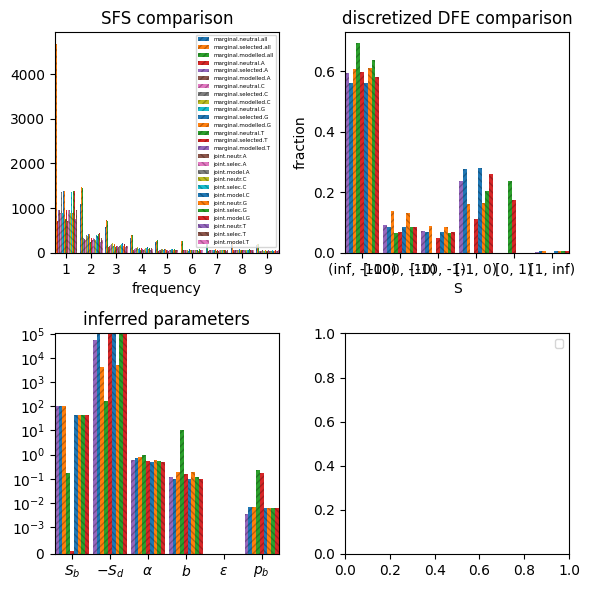

In [21]:
_, axs = plt.subplots(nrows=2, ncols=2, figsize=(6, 6))[1].flatten()

inf.plot_sfs_comparison(ax=axs[0], sfs_types=['neutral', 'selected', 'modelled'])
inf.plot_discretized(ax=axs[1])
inf.plot_inferred_parameters(ax=axs[2])
inf.plot_nested_likelihoods(ax=axs[3])